# Use decision trees to prepare a model on fraud data

treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [51]:
#Import libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()

<Figure size 3750x2000 with 0 Axes>

In [52]:
#Read data

In [53]:
fc=pd.read_csv('Fraud_check.csv')

In [54]:
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Perfoming EDA

In [55]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [56]:
fc.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [57]:
fc.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

# Creating status Column With Given Parameter

treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [58]:
fc['status'] = fc['Taxable.Income'].apply(lambda tax_inc: 'Risky' if tax_inc <= 30000 else 'Good')

fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


# Converting Categorical Data to Numerical Data

In [59]:
le = LabelEncoder()

In [60]:
fc['Undergrad'] = le.fit_transform(fc['Undergrad'])
fc['Marital.Status'] = le.fit_transform(fc['Marital.Status'])
fc['Urban'] = le.fit_transform(fc['Urban'])
fc['status'] = le.fit_transform(fc['status'])

fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


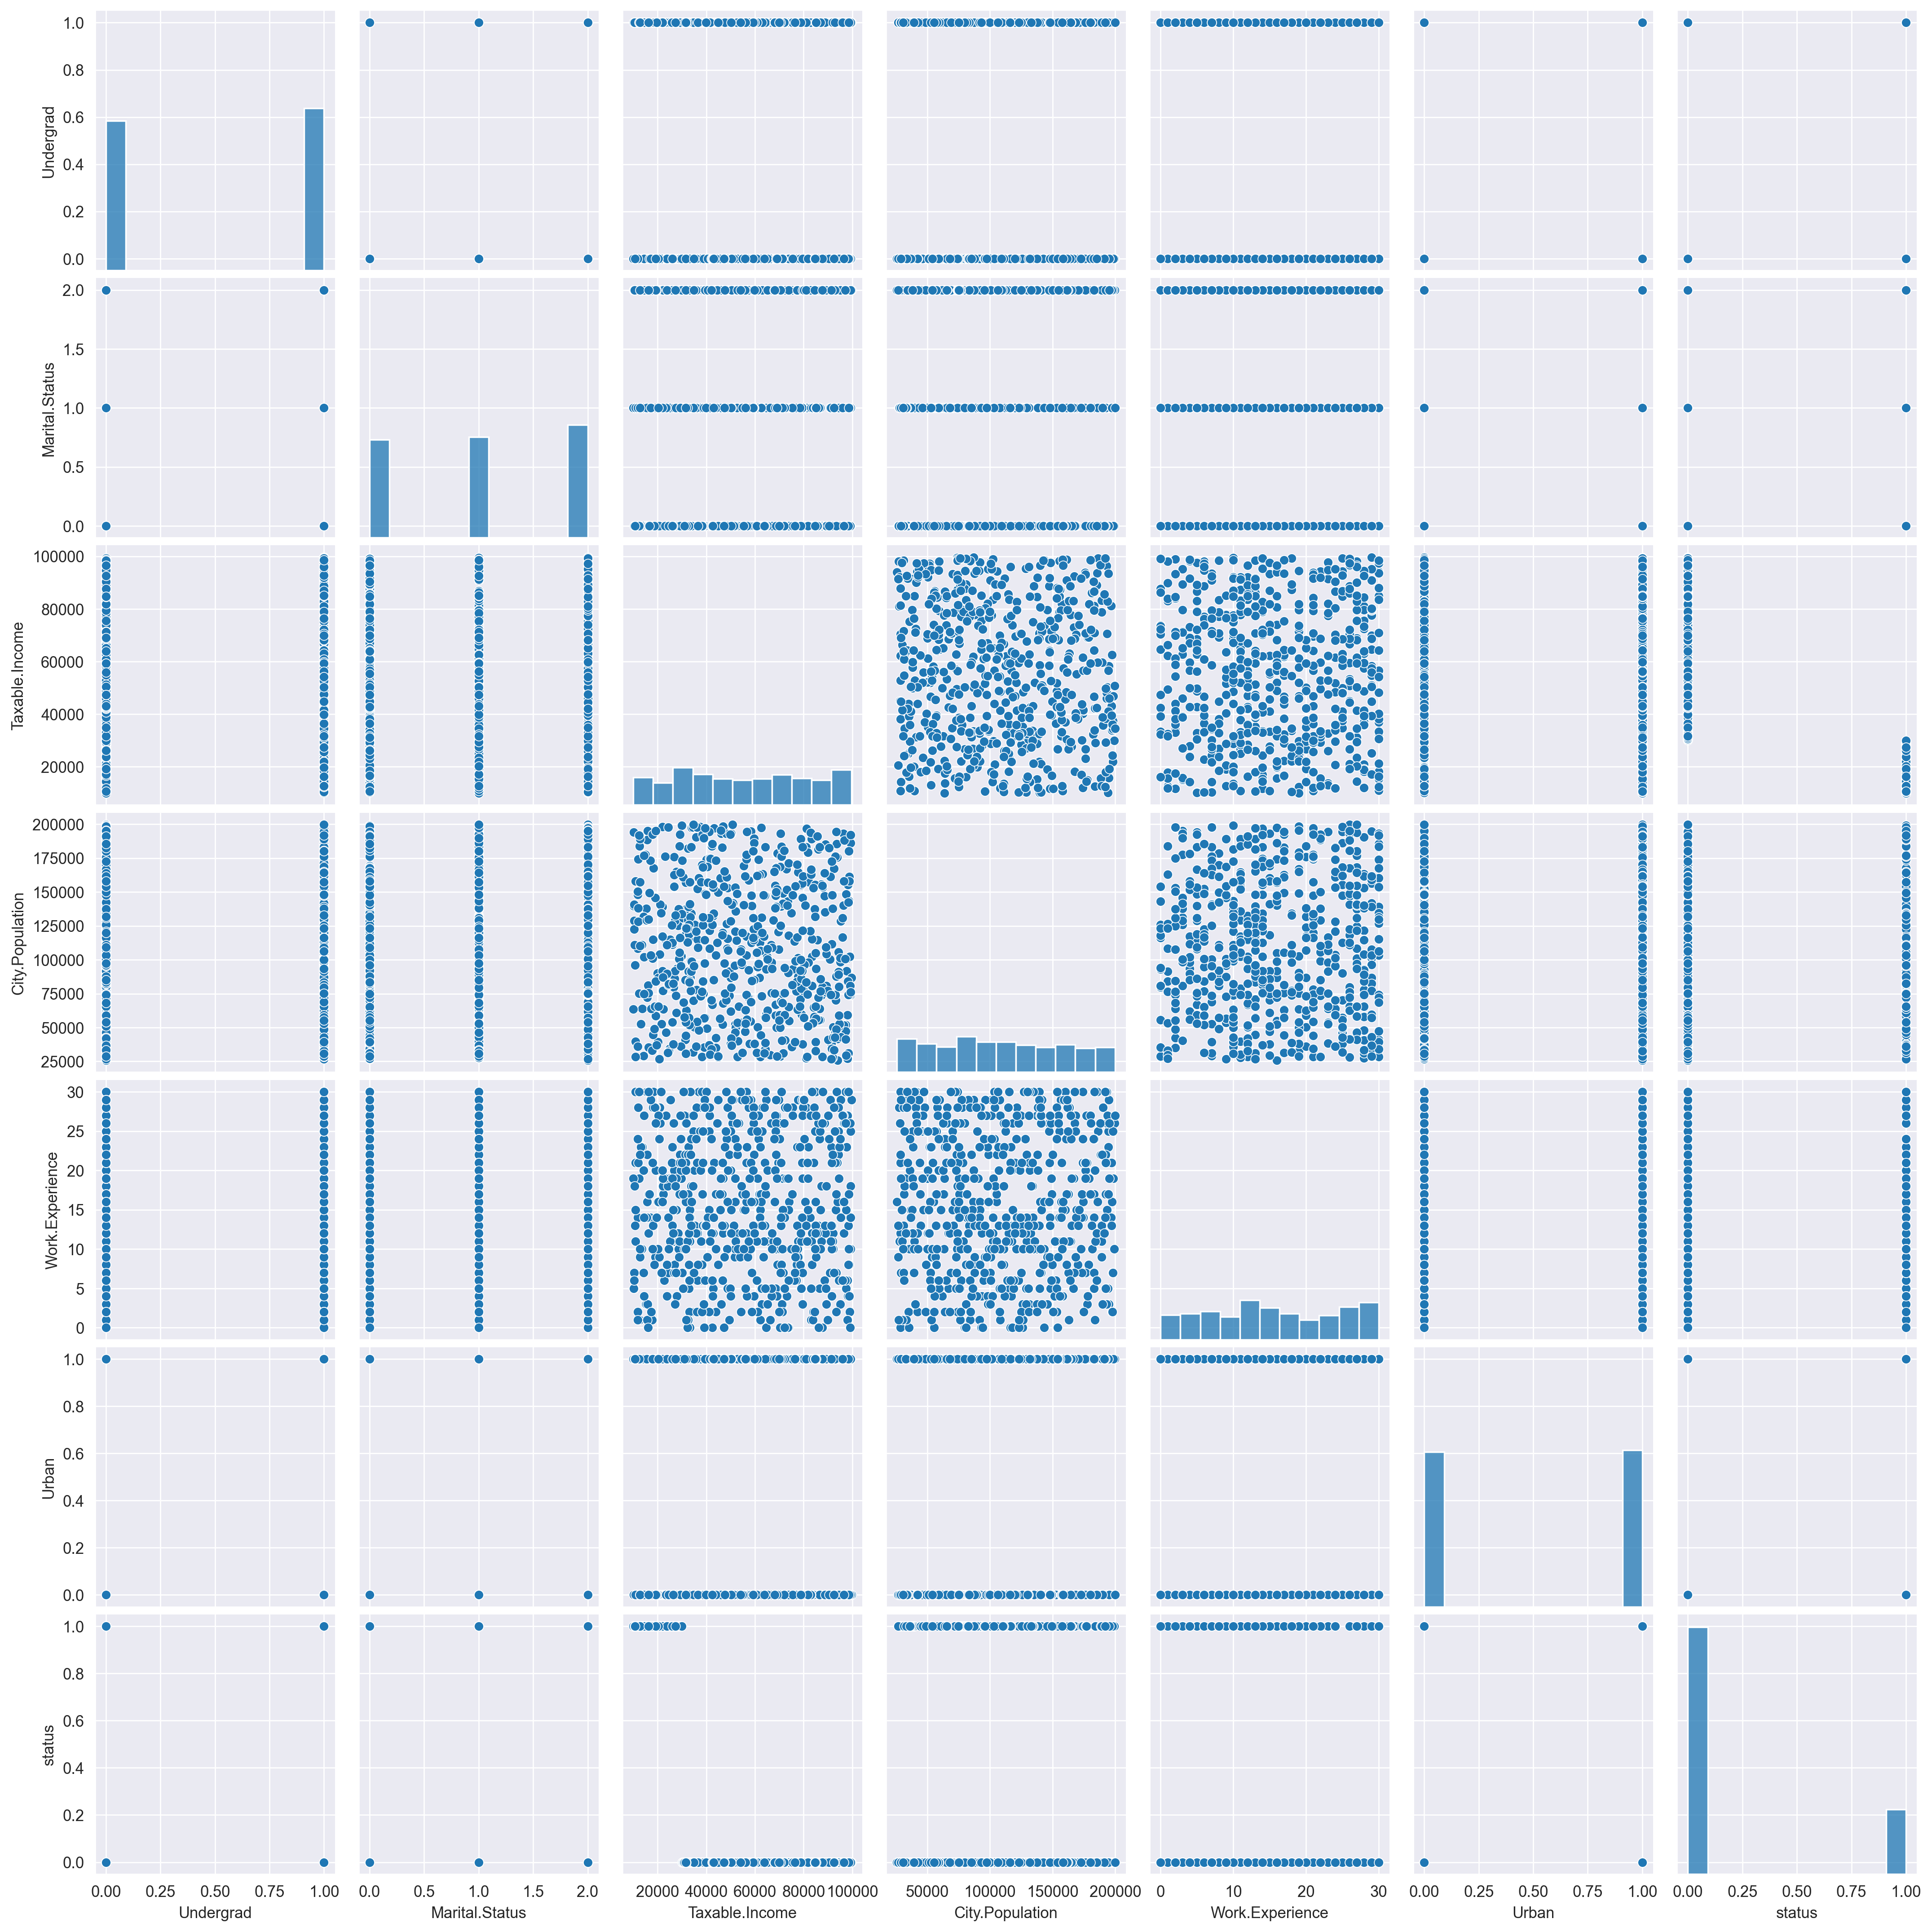

In [61]:
sns.pairplot(data=fc)

<AxesSubplot:>

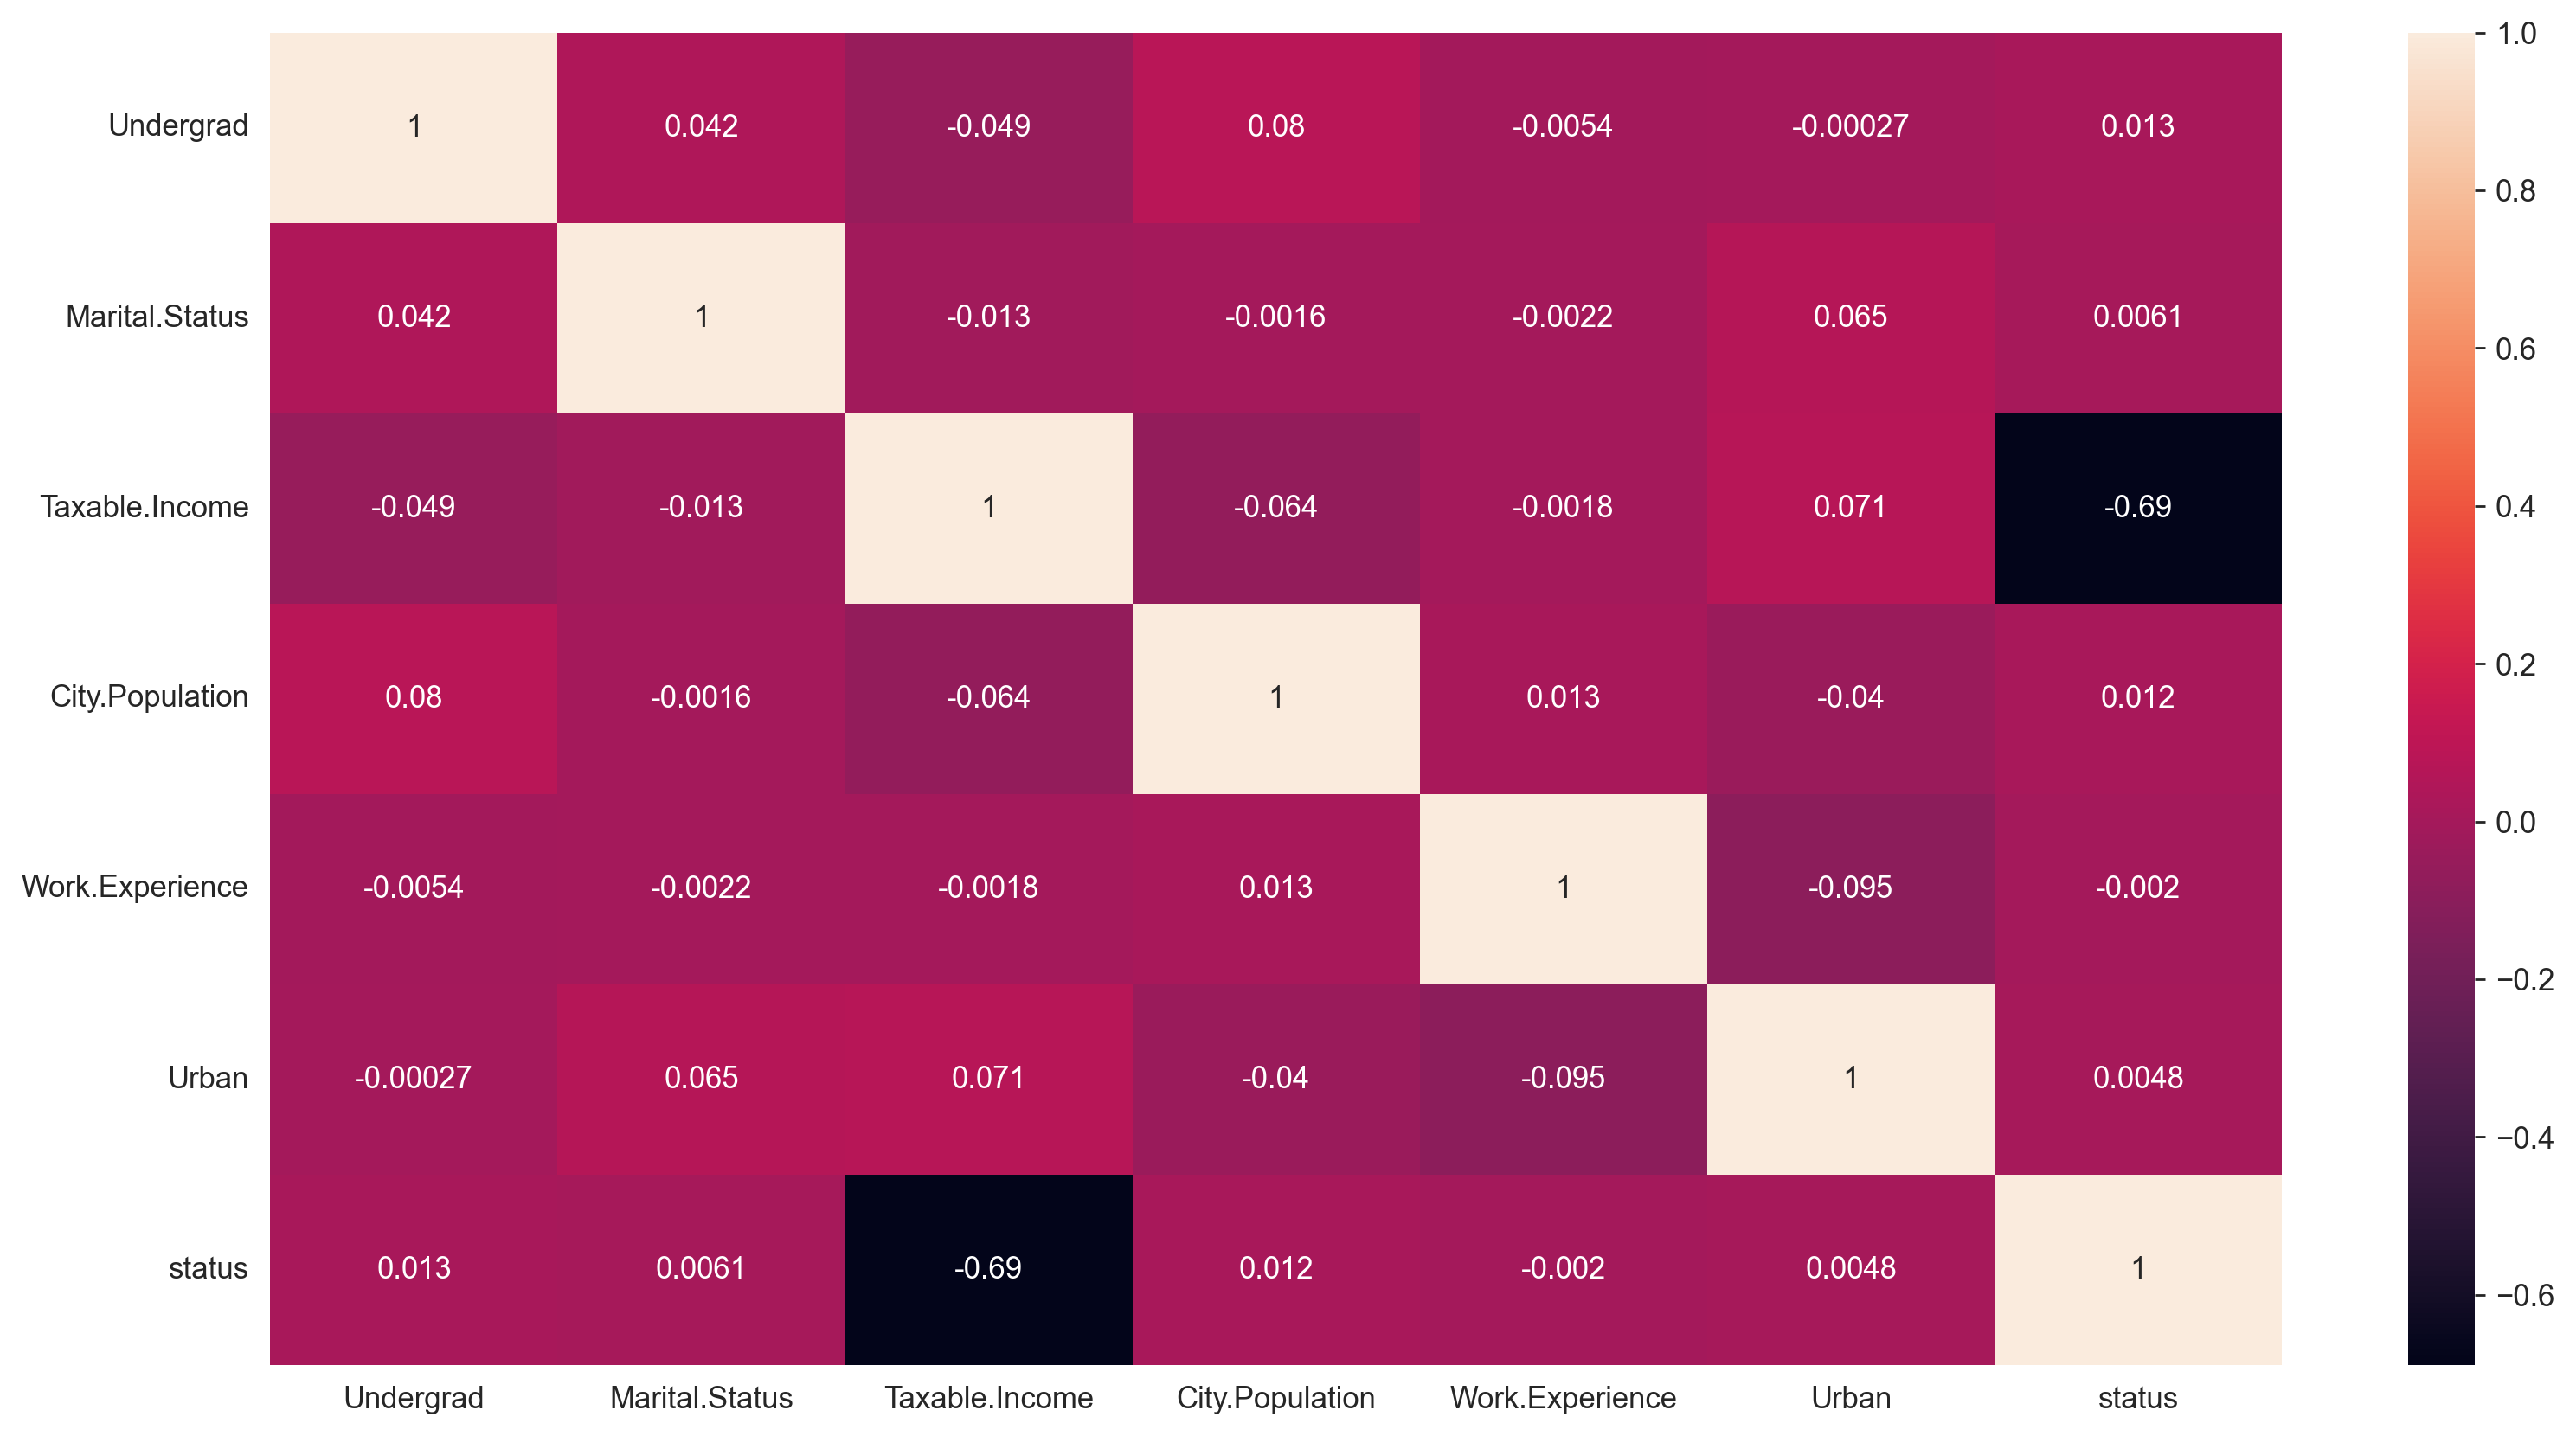

In [62]:
sns.heatmap(fc.corr(), annot=True)

# Splitting The Data Into Target and Independent set

In [63]:
x = fc.iloc[:,:-1]

y = fc['status']

In [64]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [65]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

# Splitting The Data Into Training And Testing Set

In [66]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75,random_state=1)

In [67]:
xtrain

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
546,0,1,94583,59091,6,0
68,0,2,10150,139642,5,0
472,0,1,69018,151963,11,1
4,0,1,81002,27533,28,0
187,0,2,79211,59558,5,1
...,...,...,...,...,...,...
129,1,2,53378,65469,26,0
144,1,2,79453,156503,29,1
72,1,0,41344,108300,27,1
235,0,0,77735,87541,9,0


# Model building

In [68]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

# Evaluting the model

In [69]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00        31

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [70]:
print(dt.score(xtrain,ytrain))
print(dt.score(xtest,ytest))

1.0
1.0


# Ploting Decision Tree

In [71]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [72]:
from sklearn import tree

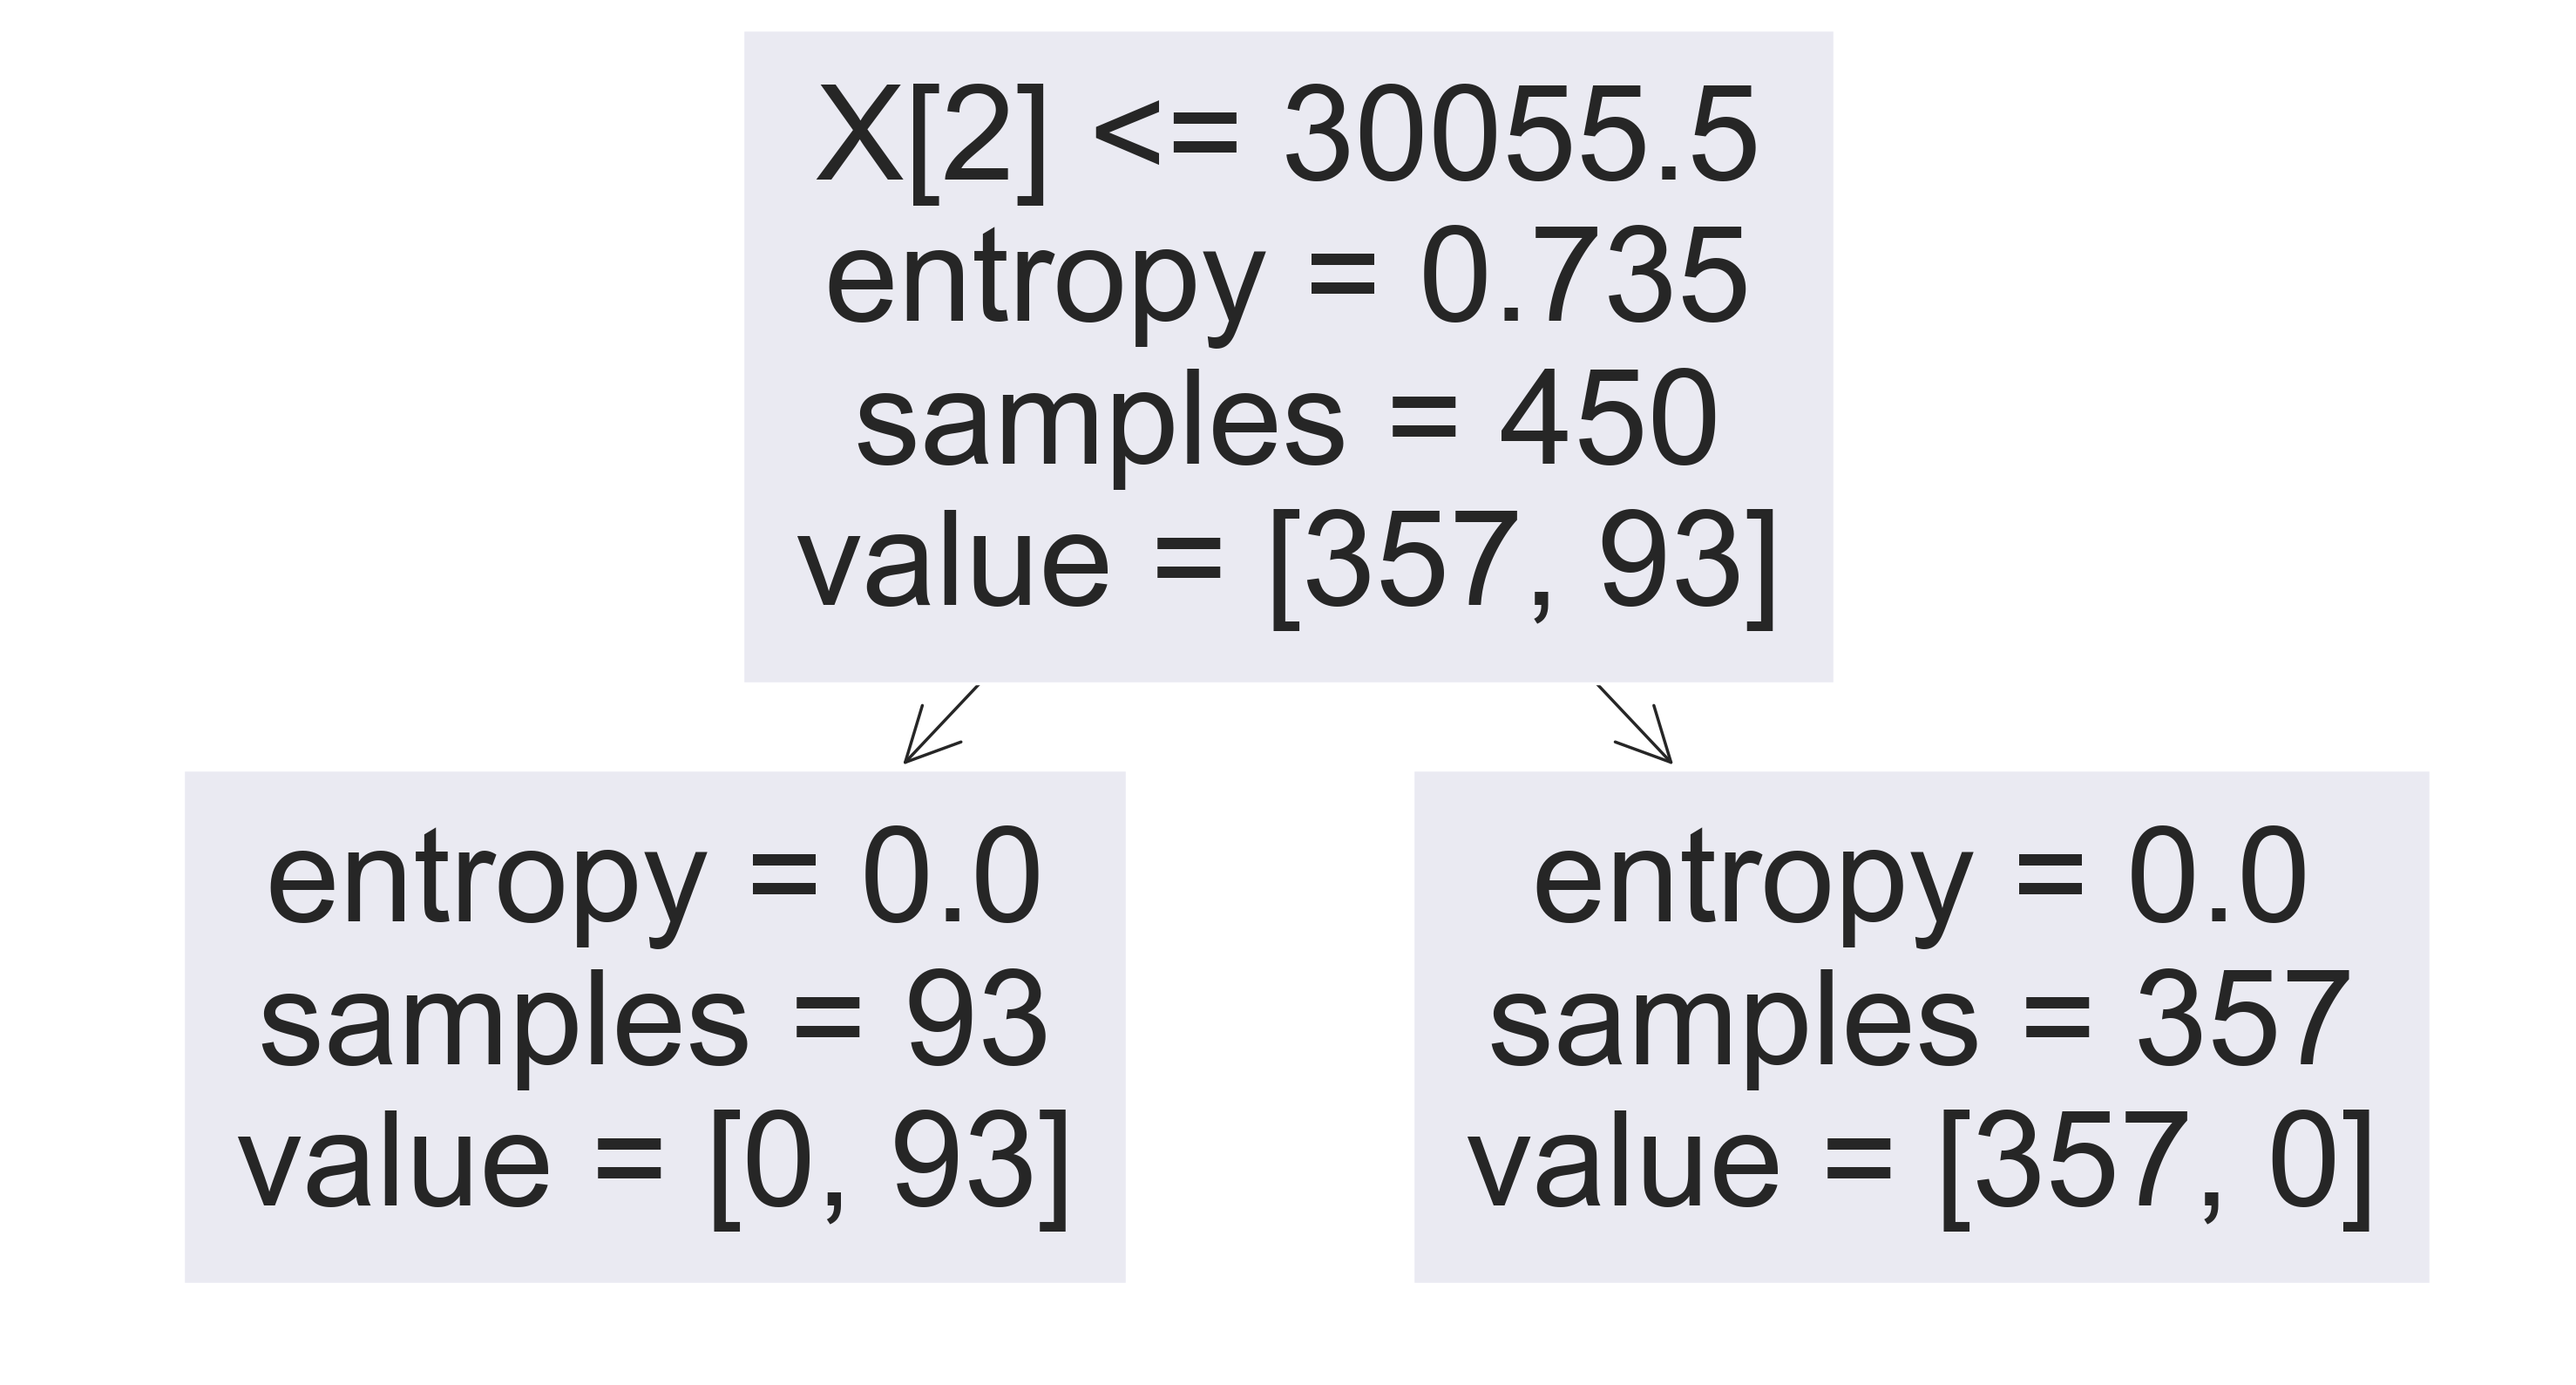

In [73]:
tree.plot_tree(dt);

# Example of regression

In [74]:
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [75]:
x = fc.iloc[:,:-1]

y = fc['status']

In [76]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.75,random_state=1)

In [77]:
dt=DecisionTreeRegressor()

dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [78]:
from sklearn.metrics import r2_score

In [79]:
r2_score(ytest,ypred)

1.0

In [80]:
print(dt.score(xtrain,ytrain))
print(dt.score(xtest,ytest))

1.0
1.0


# Hyperparameter Tuning

In [81]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [99]:
params={
    'criterion':['squared_error','absolute_error'],
    'splitter':["random","best"],
    'max_depth':[2,3,4,5,6,7,8,9]
}

In [100]:
grid=GridSearchCV(DecisionTreeRegressor(),param_grid=params,verbose=1)

In [101]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['random', 'best']},
             verbose=1)

In [102]:
grid.best_params_


{'criterion': 'squared_error', 'max_depth': 2, 'splitter': 'best'}

# Final model

In [103]:
dt=DecisionTreeRegressor(criterion='squared_error', max_depth= 2, splitter= 'best')

In [104]:
dt.fit(xtrain,ytrain)

ypred=dt.predict(xtest)

In [105]:
print(dt.score(xtrain,ytrain))
print(dt.score(xtest,ytest))

1.0
1.0


In [110]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,20)
plt.rcParams['figure.dpi']=300


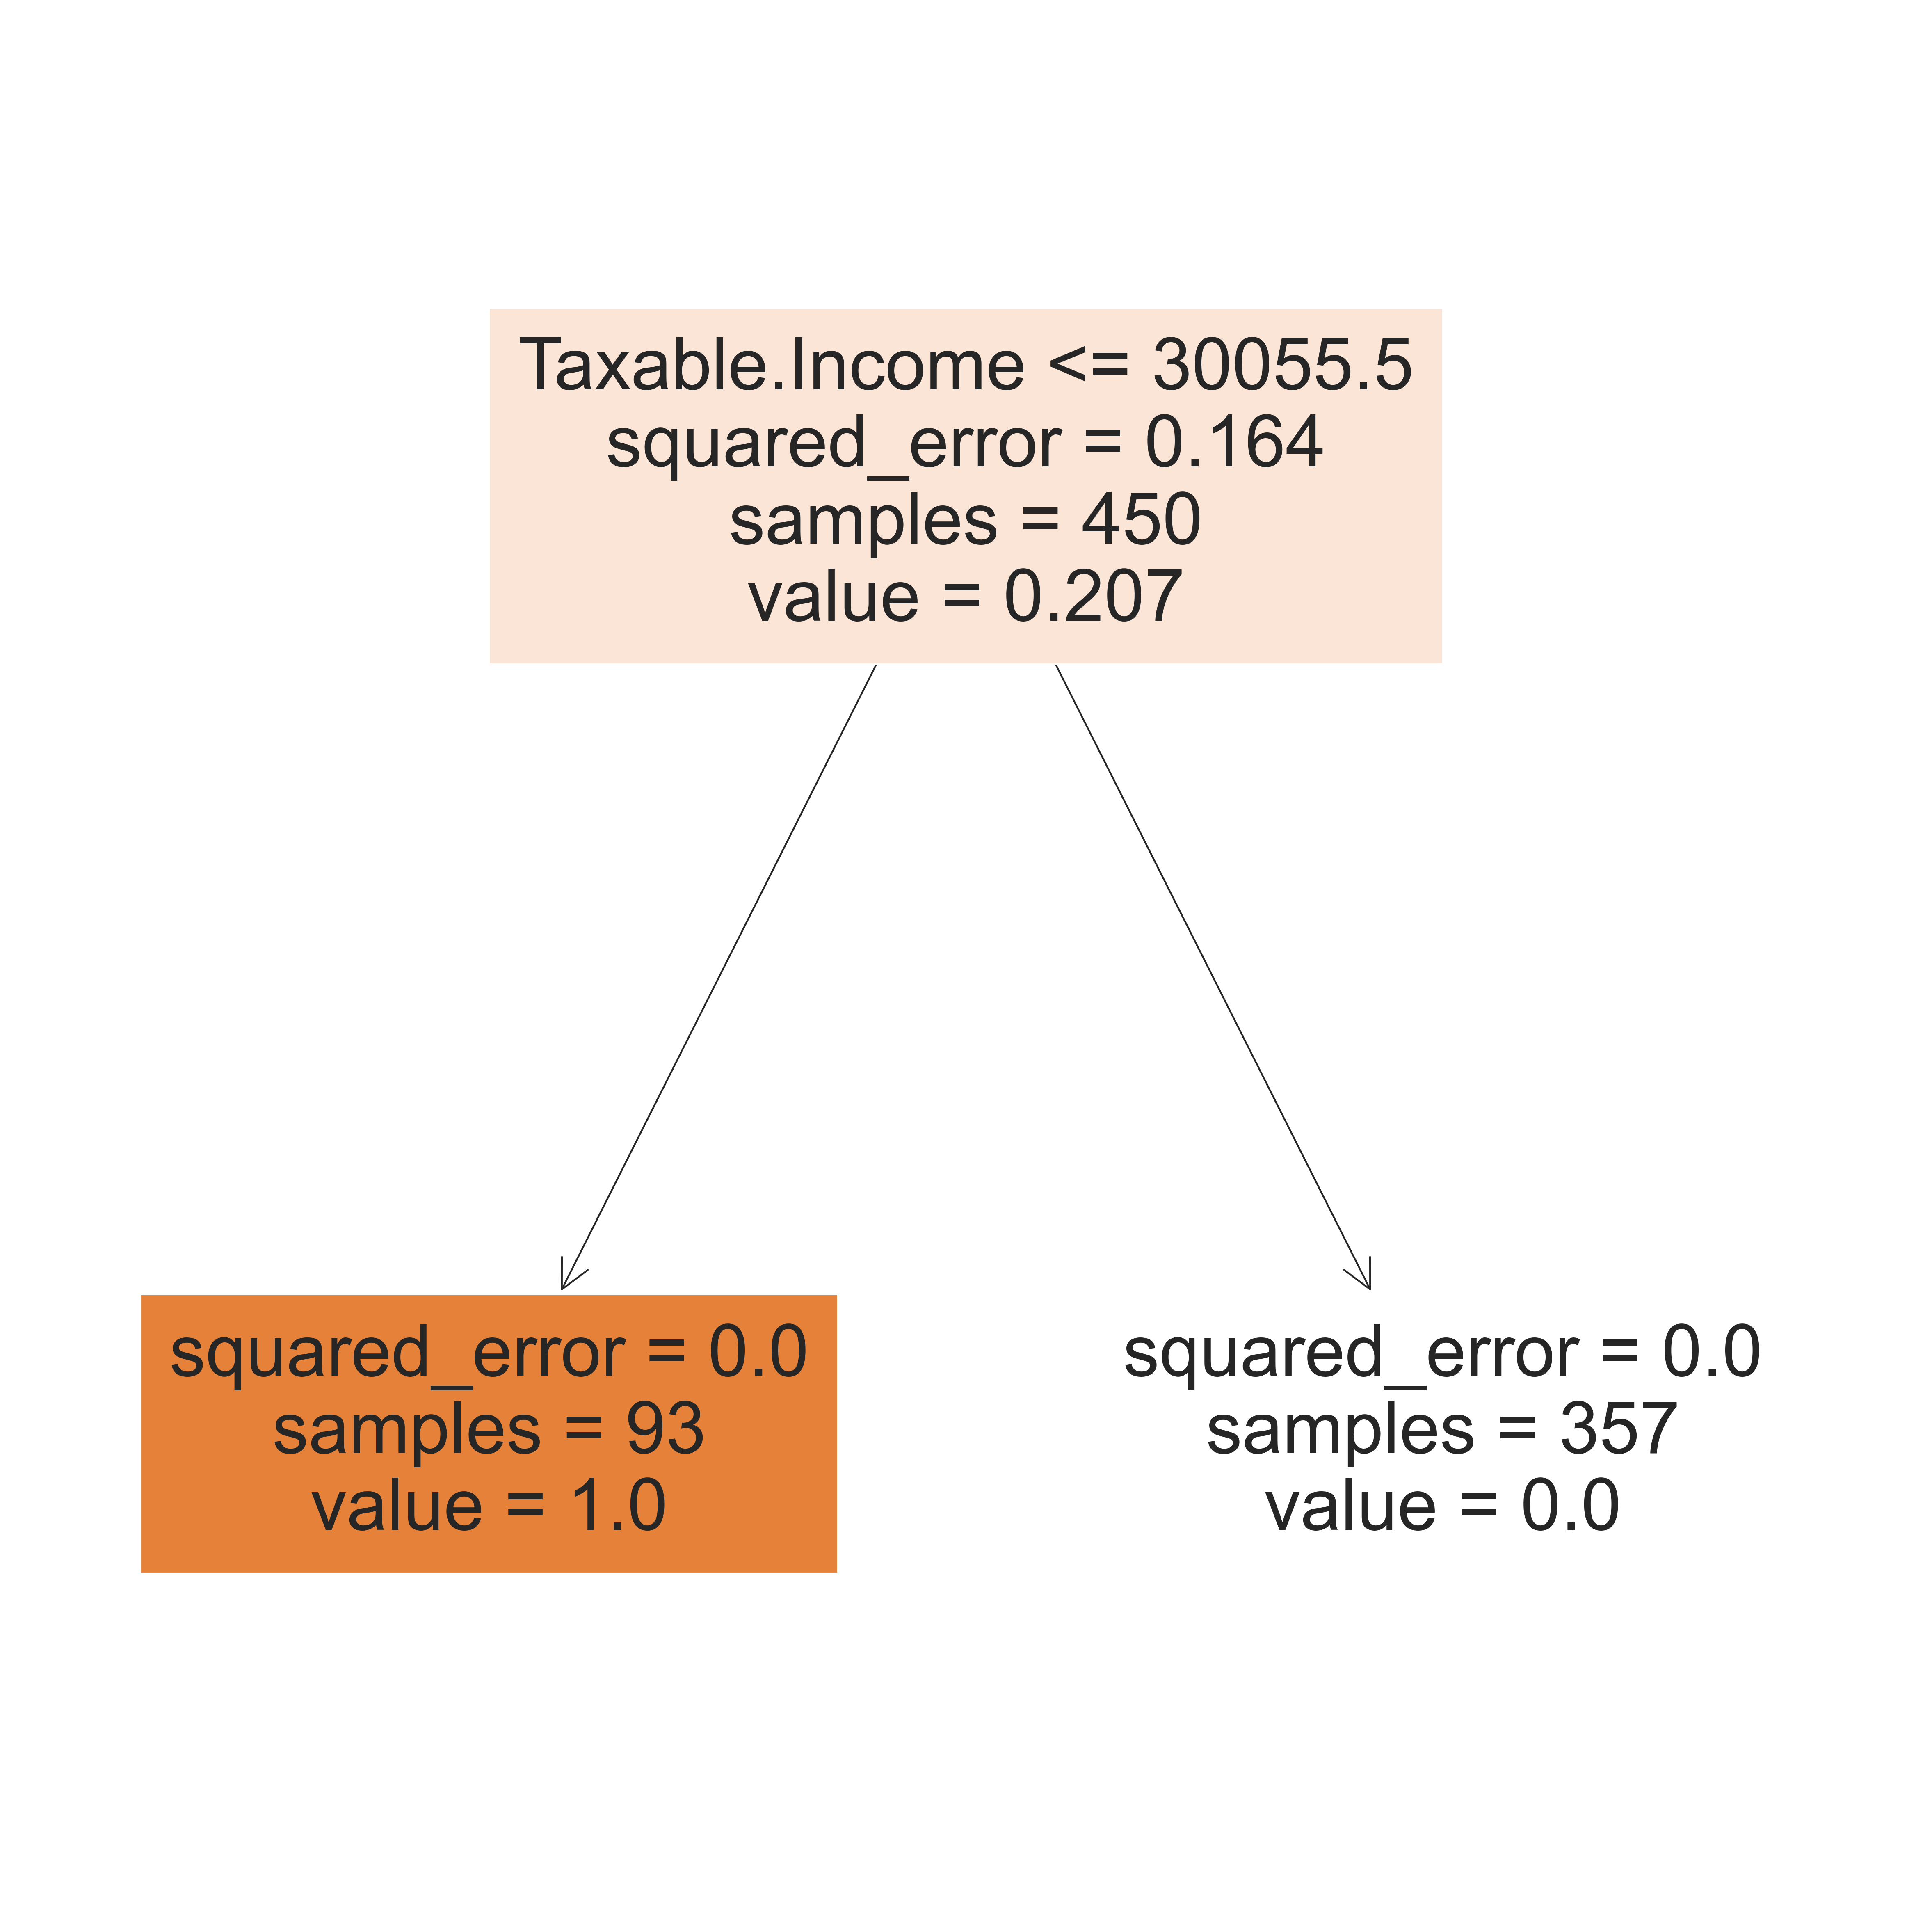

In [112]:
tree.plot_tree(dt,filled=True,feature_names=x.columns)
plt.show()